# Imports

In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
airline_passengers_data_path = "https://storage.googleapis.com/edulabs-public-datasets/airline-passengers.csv"
shampoo_sales_data_path = "https://storage.googleapis.com/edulabs-public-datasets/shampoo-sales.csv"

#This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
dayly_minimum_temp_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-minimum-temperatures.csv"

# number of daily female births in California in 1959
dayly_total_female_births_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-total-female-births.csv"

In [3]:
pd.options.plotting.backend = "plotly"


# Data loading and preprocessing

In [4]:
airline_df = pd.read_csv(airline_passengers_data_path, parse_dates=["Month"])
# airline_df
# airline_df.info()

In [5]:
ts = airline_df.set_index("Month").squeeze()

# Data visualization

Display various plots and try to determine the following:
- Does data have structure or it looks like white noise / random walk
- Is there a trend in data?
- Is there seasonality?

Try the following plots:
- Line
- Histogram
- Box

# Is data stationary?

**Determine whether your data is stationary, and if not - remove trends / seasonalities**

1. Run ADF test to find whther your data is stationary
2. If the data is not stationary - use differencing techniques to remove trend and seasonality
3. Run ADF test again after performing differencing to see whether data is stationary.
4. Run steps 2-3 again if needed

In [8]:
# Run ADF test
result = adfuller(ts)

# Display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


In [9]:
# differencing
ts.diff().plot()

In [10]:
# Run ADF test
result = adfuller(ts.diff().dropna())

# Display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


In [11]:
# differencing again
ts.diff(2).plot()

In [12]:
# Run ADF test
result = adfuller(ts.diff(2).dropna())

# Display results
print("p-value:", result[1])
print("ADF Statistic:", result[0])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

p-value: 0.03862975767698902
ADF Statistic: -2.961695135555418
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


# Now, after the data is stationary - check whether it's white noise (can it be forecasted at all?)

- Display ACF plot and check for auto-correlation
- Run Ljung-Box Test


Reminder:
**Autocorrelation Plot (ACF)**
- If no significant autocorrelation at any lag → likely white noise.
- If significant autocorrelation at lag 1 or others → likely AR process (i.e., a differenced random walk).

**Ljung-Box Test**
- A high p-value → series are like white noise
- A low p-value → autocorrelation exists - not a white noise


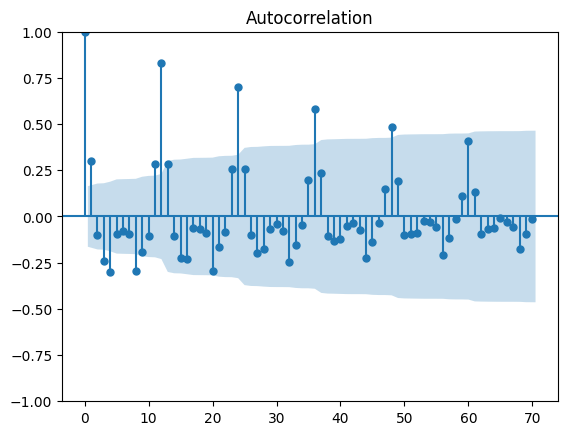

In [13]:
plot_acf(ts.diff().dropna(), lags=70) # Adjust lags as needed
plt.show()

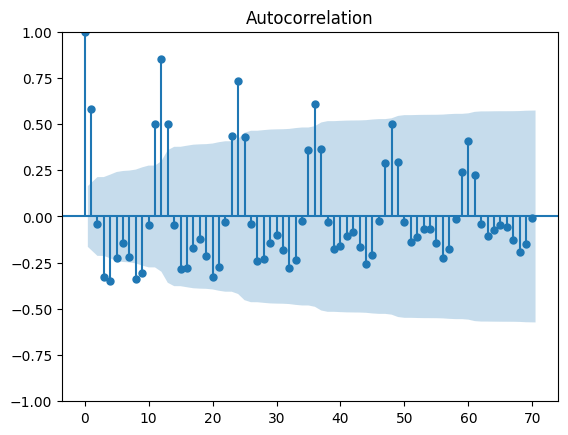

In [14]:
plot_acf(ts.diff(2).dropna(), lags=70) # Adjust lags as needed
plt.show()

In [16]:
lb_test = acorr_ljungbox(ts.diff(2).dropna(), lags=10, return_df=True)
print(lb_test)

       lb_stat     lb_pvalue
1    49.164009  2.354309e-12
2    49.438815  1.838645e-11
3    65.120836  4.726199e-14
4    83.186152  3.678710e-17
5    90.723627  4.734720e-18
6    93.929567  4.618038e-18
7   101.349737  5.676928e-19
8   119.078751  5.136883e-22
9   133.626312  2.127104e-24
10  133.945755  7.307270e-24


In [17]:
lb_test = acorr_ljungbox(ts.diff().dropna(), lags=10, return_df=True)
print(lb_test)

      lb_stat     lb_pvalue
1   13.393249  2.525316e-04
2   14.927657  5.734566e-04
3   23.549402  3.101926e-05
4   37.010908  1.792006e-07
5   38.340604  3.223072e-07
6   39.271899  6.330720e-07
7   40.572528  9.778688e-07
8   53.920949  7.151547e-09
9   59.612069  1.592385e-09
10  61.328178  2.030094e-09
